In [102]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

In [103]:
#define environment variables
r_rotor = 0.762 #m
V_tip_min = 121.92 #m/s
V_tip_max = 160.02 #m/s
V_inf_min = 0 #m/s
V_inf_max = 25.722 #m/s
rho = 1.2256 #kg/m3
alpha_1 = (-np.pi)/18 #rad
alpha_2 = 0 #rad
alpha_3 = (np.pi)/18 #rad
T = 445 #N
v_h = (T/(2*rho*np.pi*r_rotor**2))**(1/2)
P_h = T*v_h

In [117]:
#first use Newton-Raphson method to solve for lambda given environment variables

def Newton_Raphson(V_inf,alpha,V_tip,rho,r_rotor,T):
    mu = (V_inf*np.cos(alpha))/V_tip
    CT = T/((rho*np.pi*r_rotor**2)*(V_tip**2))
    root = optimize.newton(func = lambda x: ((mu*np.tan(alpha)) + CT/(2*(mu**2+x**2)**(1/2)) - x), x0 = 0, fprime2 = lambda x:((CT*x)/(2*(mu**2+x**2)**(3/2))) - 1, tol = 0.0005)
    return root


In [105]:
#plug lambdaa (root of NR method) into P/Ph equation to solve for P

def Power(V_inf,alpha,V_tip,rho,r_rotor,T):
    mu = (V_inf*np.cos(alpha))/V_tip
    CT = T/((rho*np.pi*r_rotor**2)*V_tip**2)
    lambda_h = (CT/2)**(1/2)
    v_h = (T/(2*rho*np.pi*r_rotor**2))**(1/2)
    lambdaa = Newton_Raphson(V_inf,alpha,V_tip,rho,r_rotor,T)
    P = T*v_h*(((mu/lambda_h)*np.tan(alpha))+(lambda_h/(mu**2+lambdaa**2)**(1/2))) # [W]
    
    #convert [W] to [lbf·ft/s]
    
    P = P*0.73756 #[lbf·ft/s]
    
    return P

In [106]:
#find vi

def v_i(V_inf,alpha,V_tip,rho,r_rotor,T):
    
    lambdaa = Newton_Raphson(V_inf,alpha,V_tip,rho,r_rotor,T)
    
    v_i = lambdaa*V_tip - (V_inf*np.sin(alpha)) #[m/s]
    
    #convert m/s to ft/sec
    v_i = 3.28084*v_i #[ft/s]
    
    return v_i

In [107]:
#keep Vinf constant and vary V_tip and get graph as P and v_i vs V_tip.
#run operations for 5 different Vinfs
def everything_1(V_inf_min,V_inf_max,alpha,V_tip_min,V_tip_max,rho,r_rotor,T,number_cols):
    V_inf_range = np.linspace(V_inf_min,V_inf_max,number_cols)

    vi_small_dfs = []
    Ps_small_dfs = []

    #goal: create a 5x1000 data frame (each row for each V_inf value)
    for i in V_inf_range:

        #for loop to go through Vtip values
        
        #each vis series is for one V_inf value, has as many elements as V_tip values we're trying out
        vis = []
        #each Ps series is for one V_inf value, has as many elements as V_tip values we're trying out
        Ps = []
        for j in np.linspace(V_tip_min,V_tip_max,1000):

            vi = v_i(i,alpha,j,rho,r_rotor,T)
            Pi = Power(i,alpha,j,rho,r_rotor,T)
            vis.append(vi)
            Ps.append(Pi)
        
        #converting the series into a pandas dataframe
        df_v = pd.DataFrame(vis,columns=['Vinf = '+str(3.28084*i)])
        df_P = pd.DataFrame(Ps,columns=['Vinf = '+str(3.28084*i)])

        #appending mini data frame (each minidf represents a row) to list of mini dataframes
        vi_small_dfs.append(df_v)
        Ps_small_dfs.append(df_P)

    #creating an indices column for later plotting purposes and better understanding
    indices_df = pd.DataFrame({'V_tip values': 3.28084*np.linspace(V_tip_min,V_tip_max,1000)})
    
    
    large_df_vis = pd.concat(vi_small_dfs,axis=1)
    large_df_vis = pd.concat([indices_df,large_df_vis],axis=1)
    
    
    large_df_Ps = pd.concat(Ps_small_dfs, axis=1)
    large_df_Ps = pd.concat([indices_df,large_df_Ps],axis=1)

    return large_df_vis, large_df_Ps

In [108]:
everything_1(V_inf_min,V_inf_max,alpha_1,V_tip_min,V_tip_max,rho,r_rotor,T,5)[0].head()

,V_tip values,Vinf = 0.0,Vinf = 21.09744162,Vinf = 42.19488324,Vinf = 63.292324859999994,Vinf = 84.38976648
0,400.000013,32.731002,31.116195,23.937348,17.111351,12.889317
1,400.125138,32.731005,31.116195,23.937348,17.111351,12.889317
2,400.250263,32.731009,31.116195,23.937348,17.111351,12.889317
3,400.375388,32.731012,31.116195,23.937348,17.111351,12.889317
4,400.500513,32.731016,31.116195,23.937348,17.111351,12.889317


## Plot induced velocity as a function of Vtip for alpha = -10 deg

/Users/juliebougard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


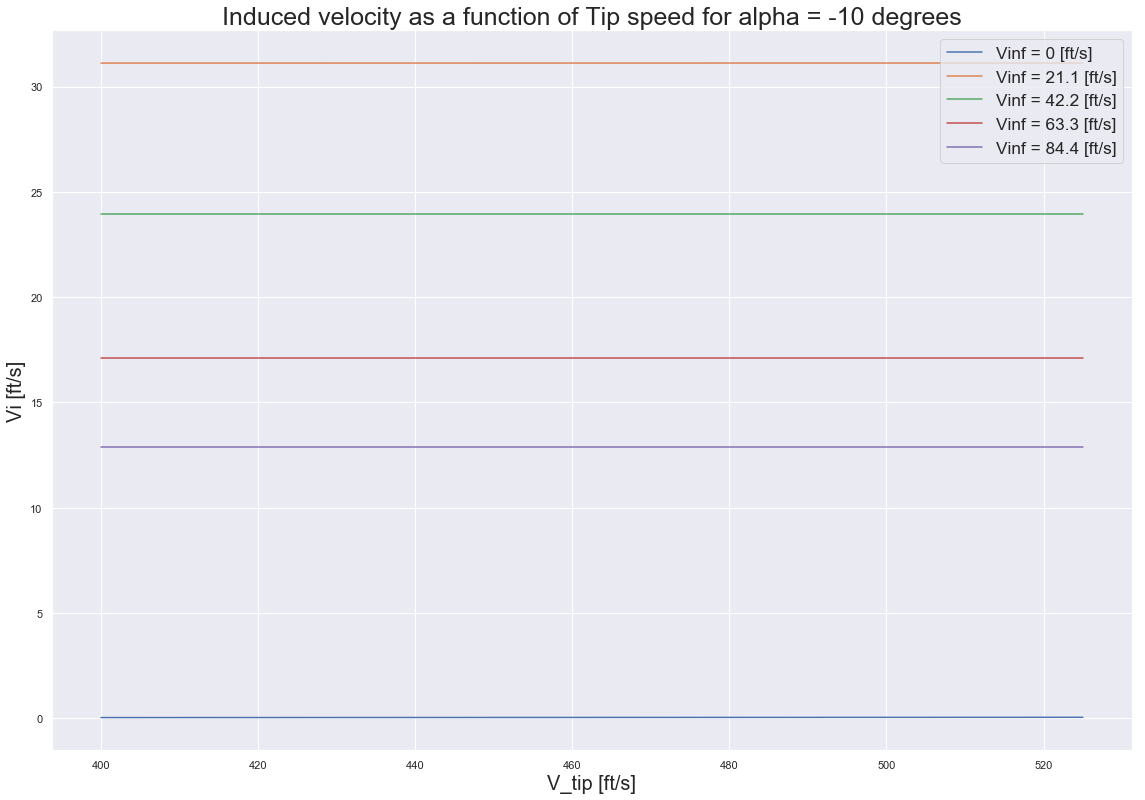

In [138]:
vis_df_1a = everything_1(V_inf_min,V_inf_max,alpha_1,V_tip_min,V_tip_max,rho,r_rotor,T,5)[0]
# Ps_df_1a = everything_1(V_inf_min,V_inf_max,alpha_1,V_tip_min,V_tip_max,rho,r_rotor,T,5)[1]

vis_df_2a = everything_1(V_inf_min,V_inf_max,alpha_2,V_tip_min,V_tip_max,rho,r_rotor,T,5)[0]
# Ps_df_2a = everything_1(V_inf_min,V_inf_max,alpha_2,V_tip_min,V_tip_max,rho,r_rotor,T,5)[1]

vis_df_3a = everything_1(V_inf_min,V_inf_max,alpha_3,V_tip_min,V_tip_max,rho,r_rotor,T,5)[0]
# Ps_df_3a = everything_1(V_inf_min,V_inf_max,alpha_3,V_tip_min,V_tip_max,rho,r_rotor,T,5)[1]

#since induced velocity does not depend on Vtip, just plot one column for each alpha

sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p1a = sns.lineplot(vis_df_1a.iloc[:, 0],vis_df_1a.iloc[:, 1],label="Vinf = 0 [ft/s]")
p1a = sns.lineplot(vis_df_1a.iloc[:, 0],vis_df_1a.iloc[:, 2],label="Vinf = 21.1 [ft/s]")
p1a = sns.lineplot(vis_df_1a.iloc[:, 0],vis_df_1a.iloc[:, 3],label="Vinf = 42.2 [ft/s]")
p1a = sns.lineplot(vis_df_1a.iloc[:, 0],vis_df_1a.iloc[:, 4],label="Vinf = 63.3 [ft/s]")
p1a = sns.lineplot(vis_df_1a.iloc[:, 0],vis_df_1a.iloc[:, 5],label="Vinf = 84.4 [ft/s]")
# p1a = sns.lineplot(vis_df_1a.iloc[:, 0],3.28084*v_h,label="v_h")
p1a.set_xlabel('V_tip [ft/s]', fontsize = 20)
p1a.set_ylabel('Vi [ft/s]', fontsize = 20)
p1a.set_title('Induced velocity as a function of Tip speed for alpha = -10 degrees', fontsize = 25)
p1a.legend(fontsize='x-large')


## Plot induced velocity as a function of Vtip for alpha = 0 deg

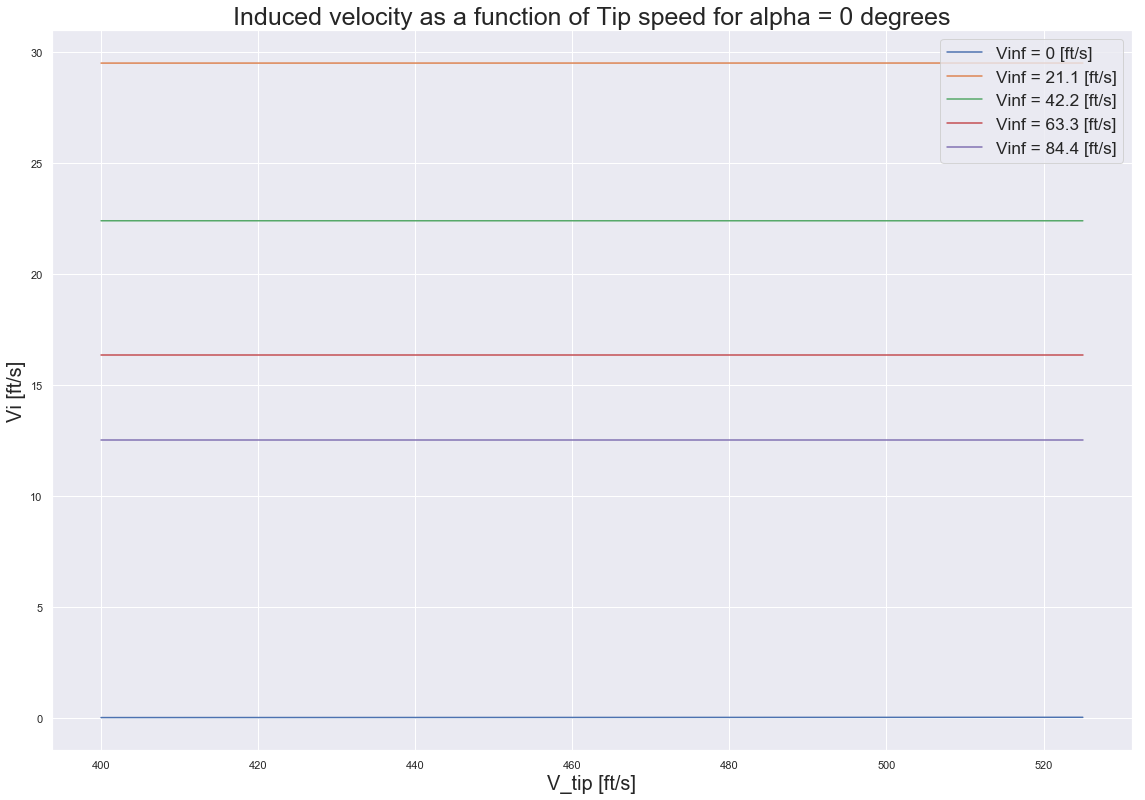

In [139]:
sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p2a = sns.lineplot(vis_df_2a.iloc[:, 0],vis_df_2a.iloc[:, 1],label="Vinf = 0 [ft/s]")
p2a = sns.lineplot(vis_df_2a.iloc[:, 0],vis_df_2a.iloc[:, 2],label="Vinf = 21.1 [ft/s]")
p2a = sns.lineplot(vis_df_2a.iloc[:, 0],vis_df_2a.iloc[:, 3],label="Vinf = 42.2 [ft/s]")
p2a = sns.lineplot(vis_df_2a.iloc[:, 0],vis_df_2a.iloc[:, 4],label="Vinf = 63.3 [ft/s]")
p2a = sns.lineplot(vis_df_2a.iloc[:, 0],vis_df_2a.iloc[:, 5],label="Vinf = 84.4 [ft/s]")
# p1a = sns.lineplot(vis_df_1a.iloc[:, 0],3.28084*v_h,label="v_h")
p2a.set_xlabel('V_tip [ft/s]', fontsize = 20)
p2a.set_ylabel('Vi [ft/s]', fontsize = 20)
p2a.set_title('Induced velocity as a function of Tip speed for alpha = 0 degrees', fontsize = 25)
p2a.legend(fontsize='x-large')

## Plot induced velocity as a function of Vtip for alpha = 10 deg

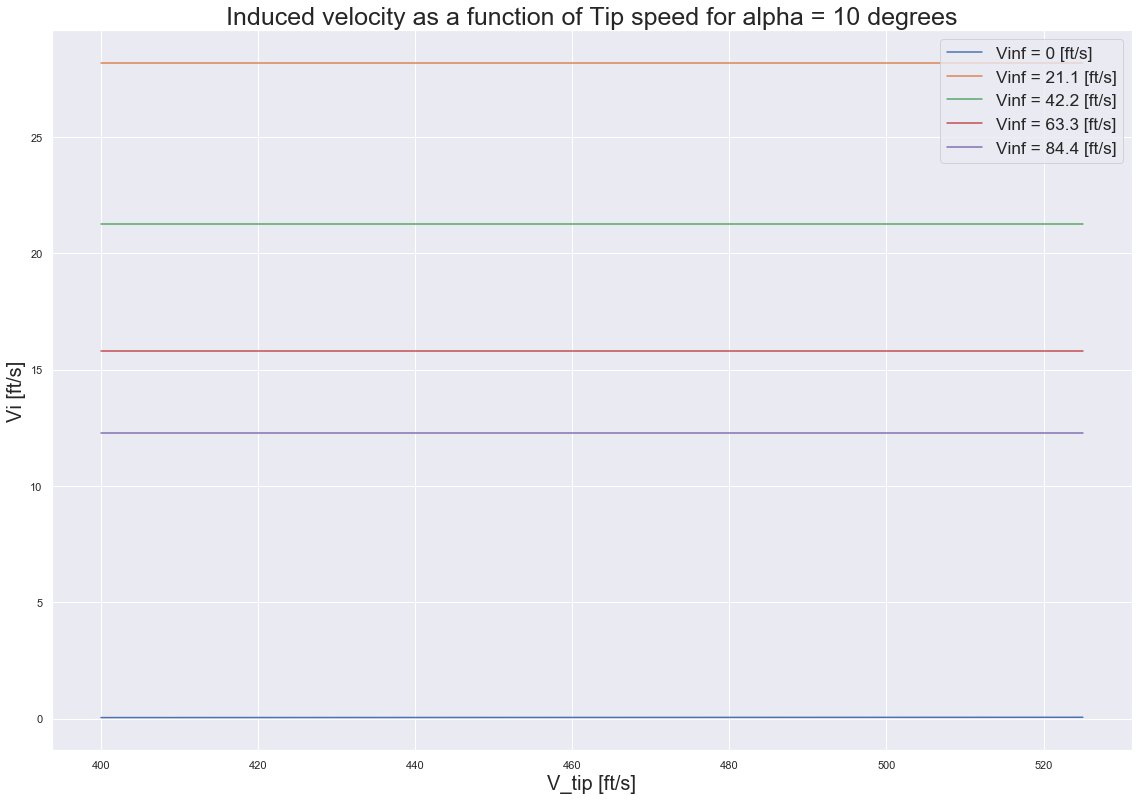

In [141]:
sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p3a = sns.lineplot(vis_df_3a.iloc[:, 0],vis_df_3a.iloc[:, 1],label="Vinf = 0 [ft/s]")
p3a = sns.lineplot(vis_df_3a.iloc[:, 0],vis_df_3a.iloc[:, 2],label="Vinf = 21.1 [ft/s]")
p3a = sns.lineplot(vis_df_3a.iloc[:, 0],vis_df_3a.iloc[:, 3],label="Vinf = 42.2 [ft/s]")
p3a = sns.lineplot(vis_df_3a.iloc[:, 0],vis_df_3a.iloc[:, 4],label="Vinf = 63.3 [ft/s]")
p3a = sns.lineplot(vis_df_3a.iloc[:, 0],vis_df_3a.iloc[:, 5],label="Vinf = 84.4 [ft/s]")
# p3a = sns.lineplot(vis_df_1a.iloc[:, 0],3.28084*v_h,label="v_h")
p3a.set_xlabel('V_tip [ft/s]', fontsize = 20)
p3a.set_ylabel('Vi [ft/s]', fontsize = 20)
p3a.set_title('Induced velocity as a function of Tip speed for alpha = 10 degrees', fontsize = 25)
p3a.legend(fontsize='x-large')

In [ ]:
# vis_df_1a = everything_1(V_inf_min,V_inf_max,alpha_1,V_tip_min,V_tip_max,rho,r_rotor,T,5)[0]
Ps_df_1a = everything_1(V_inf_min,V_inf_max,alpha_1,V_tip_min,V_tip_max,rho,r_rotor,T,5)[1]

# vis_df_2a = everything_1(V_inf_min,V_inf_max,alpha_2,V_tip_min,V_tip_max,rho,r_rotor,T,5)[0]
Ps_df_2a = everything_1(V_inf_min,V_inf_max,alpha_2,V_tip_min,V_tip_max,rho,r_rotor,T,5)[1]

# vis_df_3a = everything_1(V_inf_min,V_inf_max,alpha_3,V_tip_min,V_tip_max,rho,r_rotor,T,5)[0]
Ps_df_3a = everything_1(V_inf_min,V_inf_max,alpha_3,V_tip_min,V_tip_max,rho,r_rotor,T,5)[1]


## Plot induced power as a function of Vtip for alpha = -10 deg

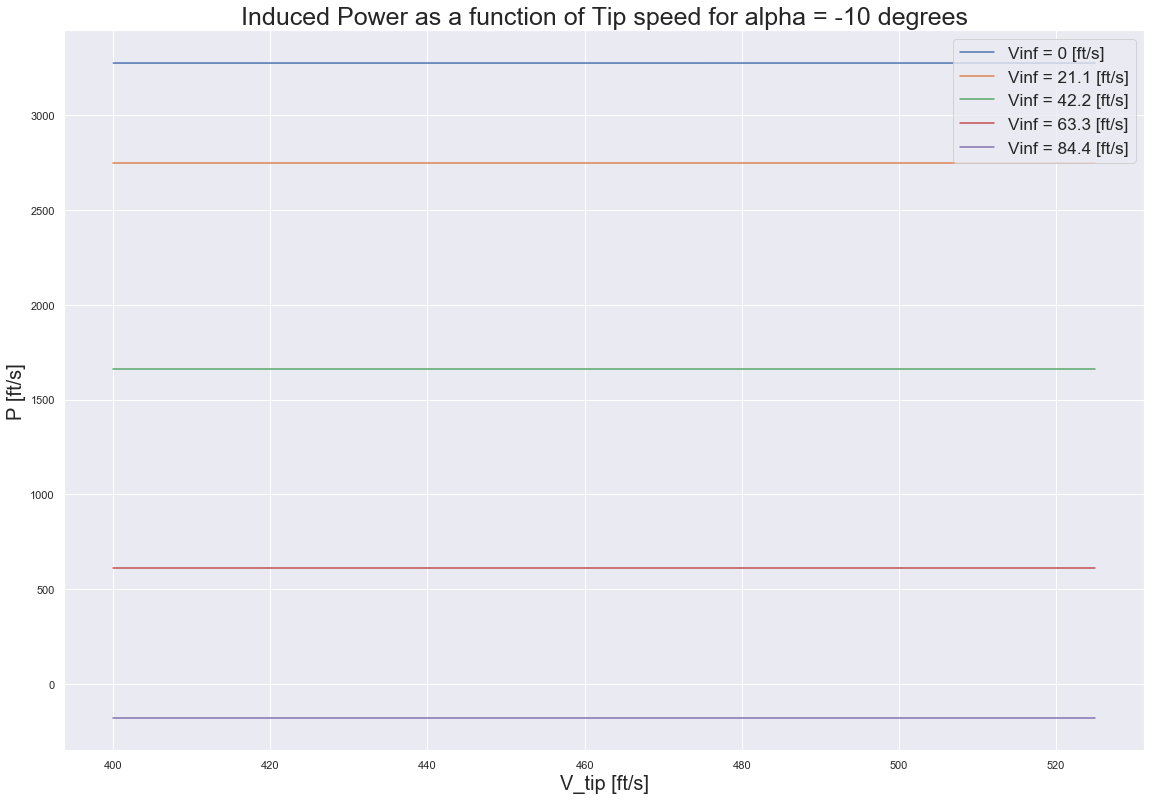

In [142]:

#since induced velocity does not depend on Vtip, just plot one column for each alpha

sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p1b = sns.lineplot(Ps_df_1a.iloc[:, 0],Ps_df_1a.iloc[:, 1],label="Vinf = 0 [ft/s]")
p1b = sns.lineplot(Ps_df_1a.iloc[:, 0],Ps_df_1a.iloc[:, 2],label="Vinf = 21.1 [ft/s]")
p1b = sns.lineplot(Ps_df_1a.iloc[:, 0],Ps_df_1a.iloc[:, 3],label="Vinf = 42.2 [ft/s]")
p1b = sns.lineplot(Ps_df_1a.iloc[:, 0],Ps_df_1a.iloc[:, 4],label="Vinf = 63.3 [ft/s]")
p1b = sns.lineplot(Ps_df_1a.iloc[:, 0],Ps_df_1a.iloc[:, 5],label="Vinf = 84.4 [ft/s]")
p1b.set_xlabel('V_tip [ft/s]', fontsize = 20)
p1b.set_ylabel('P [ft/s]', fontsize = 20)
p1b.set_title('Induced Power as a function of Tip speed for alpha = -10 degrees', fontsize = 25)
p1b.legend(fontsize='x-large')

## Plot induced power as a function of Vtip for alpha = 0 deg

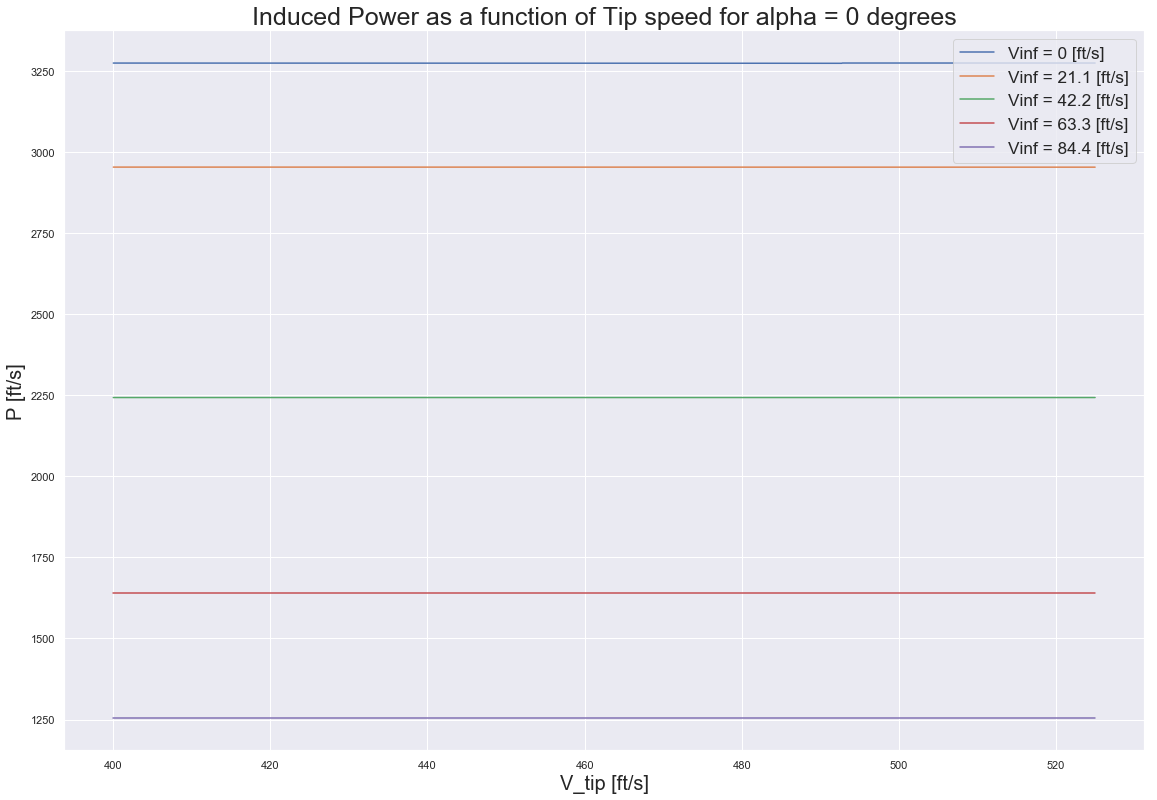

In [143]:

#since induced velocity does not depend on Vtip, just plot one column for each alpha

sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p2b = sns.lineplot(Ps_df_2a.iloc[:, 0],Ps_df_2a.iloc[:, 1],label="Vinf = 0 [ft/s]")
p2b = sns.lineplot(Ps_df_2a.iloc[:, 0],Ps_df_2a.iloc[:, 2],label="Vinf = 21.1 [ft/s]")
p2b = sns.lineplot(Ps_df_2a.iloc[:, 0],Ps_df_2a.iloc[:, 3],label="Vinf = 42.2 [ft/s]")
p2b = sns.lineplot(Ps_df_2a.iloc[:, 0],Ps_df_2a.iloc[:, 4],label="Vinf = 63.3 [ft/s]")
p2b = sns.lineplot(Ps_df_2a.iloc[:, 0],Ps_df_2a.iloc[:, 5],label="Vinf = 84.4 [ft/s]")
p2b.set_xlabel('V_tip [ft/s]', fontsize = 20)
p2b.set_ylabel('P [ft/s]', fontsize = 20)
p2b.set_title('Induced Power as a function of Tip speed for alpha = 0 degrees', fontsize = 25)
p2b.legend(fontsize='x-large')

## Plot induced power as a function of Vtip for alpha = 10 deg

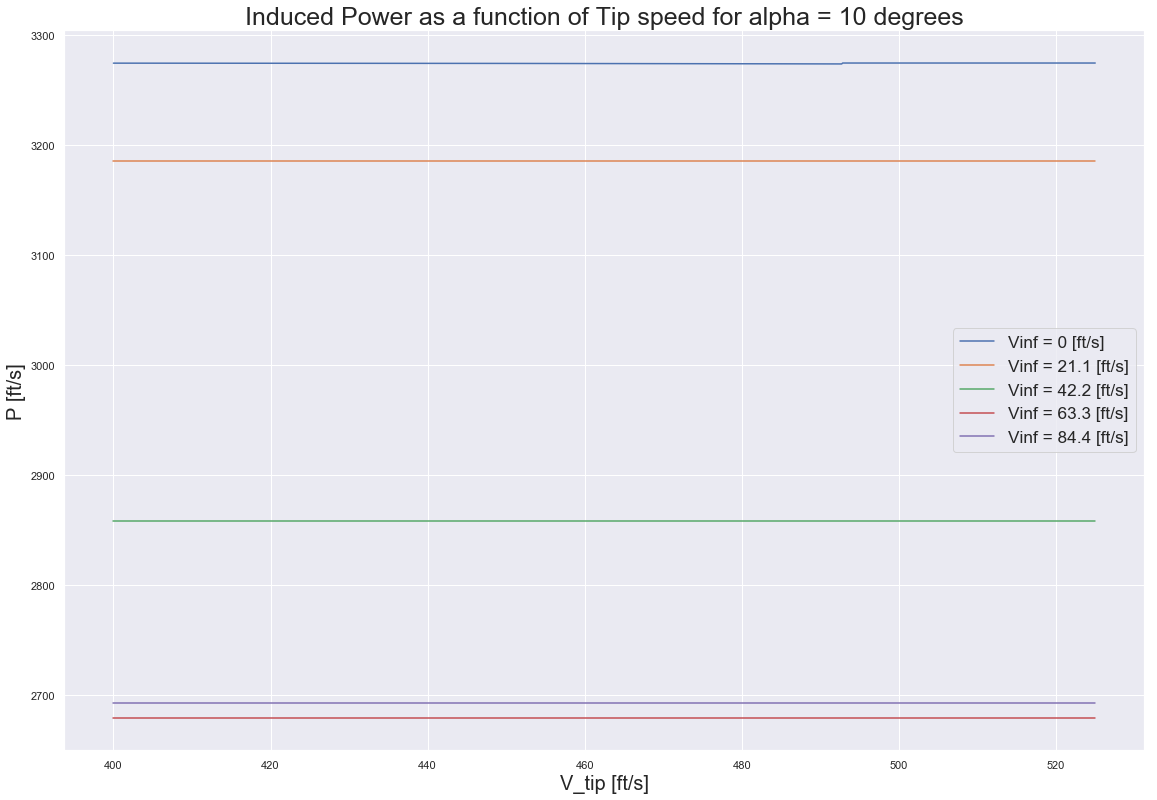

In [137]:
#since induced velocity does not depend on Vtip, just plot one column for each alpha

sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p3b = sns.lineplot(Ps_df_3a.iloc[:, 0],Ps_df_3a.iloc[:, 1],label="Vinf = 0 [ft/s]",)
p3b = sns.lineplot(Ps_df_3a.iloc[:, 0],Ps_df_3a.iloc[:, 2],label="Vinf = 21.1 [ft/s]")
p3b = sns.lineplot(Ps_df_3a.iloc[:, 0],Ps_df_3a.iloc[:, 3],label="Vinf = 42.2 [ft/s]")
p3b = sns.lineplot(Ps_df_3a.iloc[:, 0],Ps_df_3a.iloc[:, 4],label="Vinf = 63.3 [ft/s]")
p3b = sns.lineplot(Ps_df_3a.iloc[:, 0],Ps_df_3a.iloc[:, 5],label="Vinf = 84.4 [ft/s]")
p3b.set_xlabel('V_tip [ft/s]', fontsize = 20)
p3b.set_ylabel('P [ft/s]', fontsize = 20)
p3b.set_title('Induced Power as a function of Tip speed for alpha = 10 degrees', fontsize = 25)
p3b.legend(fontsize='x-large')

## Keep Vtip constant and vary Vinf and get graph as P and v_i vs V_inf.

In [73]:
#keep Vtip constant and vary Vinf and get graph as P and v_i vs V_inf.
#run operations for 5 different Vinfs
def everything(V_inf_min,V_inf_max,alpha,V_tip_min,V_tip_max,rho,r_rotor,T,number_cols):
#     V_inf_range = np.linspace(V_inf_min,V_inf_max,number_cols)
    V_tip_range = np.linspace(V_tip_min,V_tip_max,number_cols)

    vi_small_dfs = []
    Ps_small_dfs = []

    #goal: create a 5x1000 data frame (each row for each V_inf value)
    for i in V_tip_range:

        #for loop to go through Vtip values
        
        #each vis series is for one V_inf value, has as many elements as V_tip values we're trying out
        vis = []
        #each Ps series is for one V_inf value, has as many elements as V_tip values we're trying out
        Ps = []
        
        indices = []
        
        for j in np.linspace(V_inf_min,V_inf_max,1000):

            vi = v_i(j,alpha,i,rho,r_rotor,T)
            Pi = Power(j,alpha,i,rho,r_rotor,T)
            vis.append(vi)
            Ps.append(Pi)

        #converting the series into a pandas dataframe
        df_v = pd.DataFrame(vis,columns=['Vtip = '+str(i)])
        df_P = pd.DataFrame(Ps,columns=['Vtip = '+str(i)])
        
        #appending mini data frame (each minidf represents a row) to list of mini dataframes
        # these two things are series.
        #it takes less time to concatenate multiple mini dataframes (each mini dframe is an element of the series)
        vi_small_dfs.append(df_v)
        Ps_small_dfs.append(df_P)
    
    #creating an indices column for later plotting purposes and better understanding, also converting V_inf values back to ft/sec
    indices_df = pd.DataFrame({'V_inf values': 3.28084*np.linspace(V_inf_min,V_inf_max,1000)})
    
    
    large_df_vis = pd.concat(vi_small_dfs,axis=1)
    large_df_vis = pd.concat([indices_df,large_df_vis],axis=1)
    
    
    large_df_Ps = pd.concat(Ps_small_dfs, axis=1)
    large_df_Ps = pd.concat([indices_df,large_df_Ps],axis=1)
    
    return large_df_vis, large_df_Ps

In [68]:
everything_1(V_inf_min,V_inf_max,alpha_2,V_tip_min,V_tip_max,rho,r_rotor,T,5)[1].head()

,V_tip values,Vinf = 0.0,Vinf = 6.4305,Vinf = 12.861,Vinf = 19.2915,Vinf = 25.722
0,400.000013,3274.195199,2953.414287,2242.876376,1639.179447,1256.089603
1,400.125138,3274.194846,2953.414287,2242.876376,1639.179447,1256.089603
2,400.250263,3274.194491,2953.414287,2242.876376,1639.179447,1256.089603
3,400.375388,3274.194135,2953.414287,2242.876376,1639.179447,1256.089603
4,400.500513,3274.193779,2953.414287,2242.876376,1639.179447,1256.089603


/Users/juliebougard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


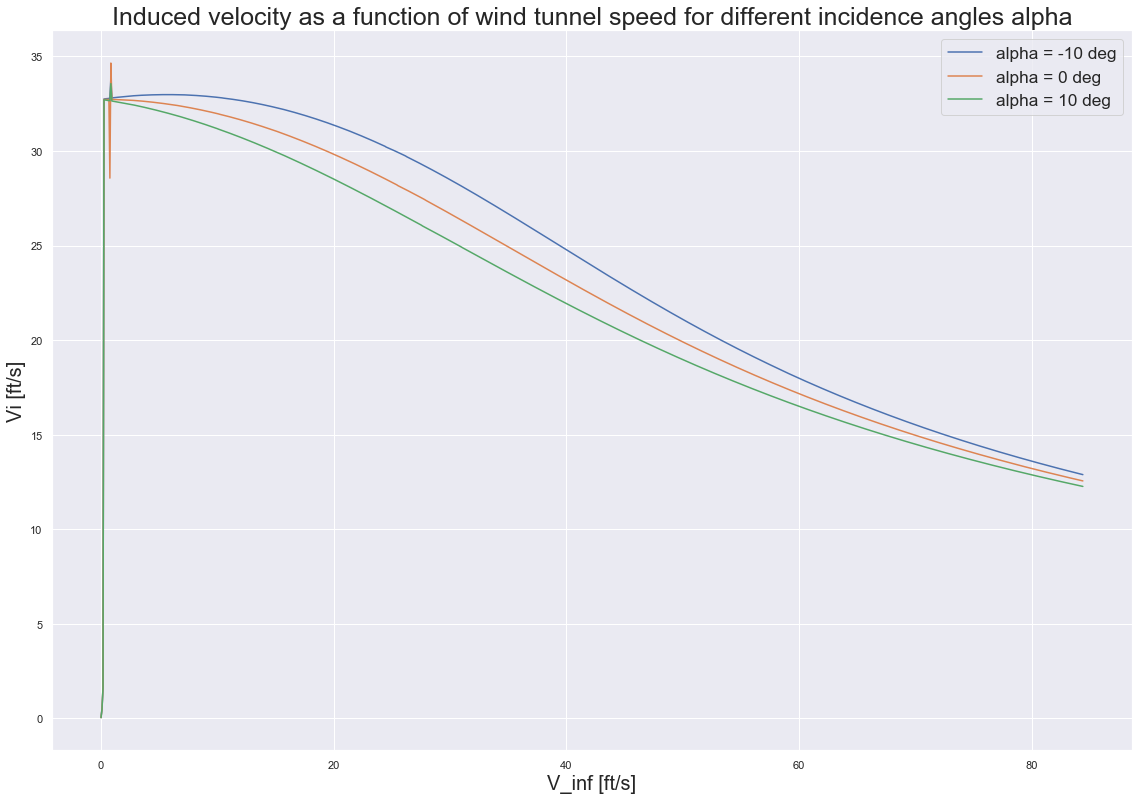

In [146]:
#plot results

vis_df_1 = everything(V_inf_min,V_inf_max,alpha_1,V_tip_min,V_tip_max,rho,r_rotor,T,5)[0]
Ps_df_1 = everything(V_inf_min,V_inf_max,alpha_1,V_tip_min,V_tip_max,rho,r_rotor,T,5)[1]

vis_df_2 = everything(V_inf_min,V_inf_max,alpha_2,V_tip_min,V_tip_max,rho,r_rotor,T,5)[0]
Ps_df_2 = everything(V_inf_min,V_inf_max,alpha_2,V_tip_min,V_tip_max,rho,r_rotor,T,5)[1]

vis_df_3 = everything(V_inf_min,V_inf_max,alpha_3,V_tip_min,V_tip_max,rho,r_rotor,T,5)[0]
Ps_df_3 = everything(V_inf_min,V_inf_max,alpha_3,V_tip_min,V_tip_max,rho,r_rotor,T,5)[1]

#since induced velocity is approx constant in our Vtip range, just plot one column for each alpha

sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p1 = sns.lineplot(vis_df_1.iloc[:, 0],vis_df_1.iloc[:, 1],label="alpha = -10 deg")
p1 = sns.lineplot(vis_df_2.iloc[:, 0],vis_df_2.iloc[:, 1],label="alpha = 0 deg")
p1 = sns.lineplot(vis_df_3.iloc[:, 0],vis_df_3.iloc[:, 1],label="alpha = 10 deg")

#plotting 
# p1 = sns.lineplot(vis_df_3.iloc[:, 0],3.28084*v_h,label="v_h")
p1.set_xlabel('V_inf [ft/s]', fontsize = 20)
p1.set_ylabel('Vi [ft/s]', fontsize = 20)
p1.set_title('Induced velocity as a function of wind tunnel speed for different incidence angles alpha', fontsize = 25)
p1.legend(fontsize='x-large')


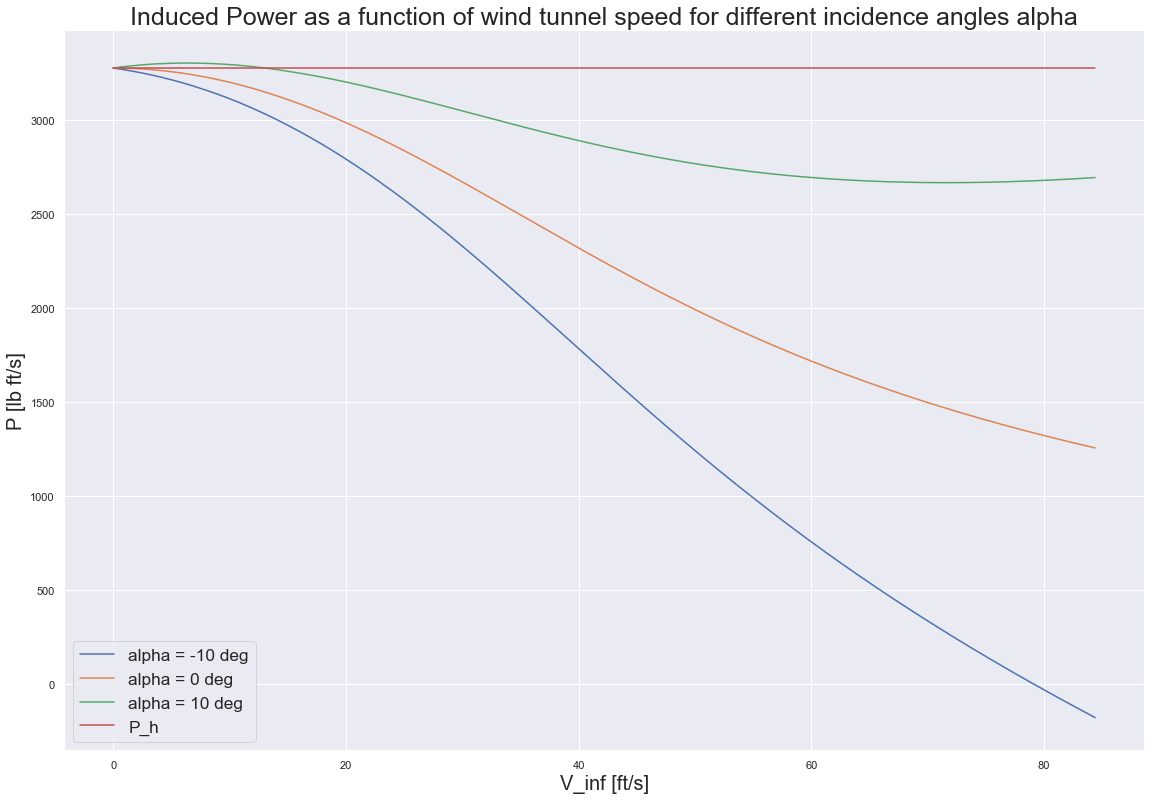

In [135]:
sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p2 = sns.lineplot(Ps_df_1.iloc[:, 0],Ps_df_1.iloc[:, 1],label="alpha = -10 deg")
p2 = sns.lineplot(Ps_df_2.iloc[:, 0],Ps_df_2.iloc[:, 1],label="alpha = 0 deg")
p2 = sns.lineplot(Ps_df_3.iloc[:, 0],Ps_df_3.iloc[:, 1],label="alpha = 10 deg")
p2 = sns.lineplot(Ps_df_3.iloc[:, 0],P_h*0.73756,label="P_h")
p2.set_xlabel('V_inf [ft/s]', fontsize = 20)
p2.set_ylabel('P [lb ft/s]', fontsize = 20)
p2.set_title('Induced Power as a function of wind tunnel speed for different incidence angles alpha', fontsize = 25)
p2.legend(fontsize='x-large')
